<a href="https://colab.research.google.com/github/shalita-wahyudhie/EDA_marketing_analytics/blob/main/Exploratory_Data_Analysis_Marketing_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis Using Marketing Dataset

Marketing Analytics dataset obtained from [Kaggle](https://www.kaggle.com/datasets/jackdaoud/marketing-data).

In [239]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [240]:
# Import pandas package
import pandas as pd

In [241]:
# Read csv data using pandas 
data = pd.read_csv('/content/gdrive/MyDrive/Data/Marketing Analytics/marketing_data.csv')

# Show data preview
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [242]:
# Getting the big picture of the data
data.shape

(2240, 28)

In [243]:
# Check data types in every columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [244]:
# clean up whitespace in column name
data.columns = data.columns.str.replace(' ', '')

# Change income to float
data['Income'] = data['Income'].str.replace('$', '')
data['Income'] = data['Income'].str.replace(',', '').astype('float')

# Change Dt_customer to date time data type
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

<ipython-input-244-b68fe942e7d3>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Income'] = data['Income'].str.replace('$', '')


In [245]:
# Check the updated data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [246]:
# Check to see if there's any missing value
data.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

From the result, we see that only Income column has missing values. Income column has 24 missing values. We want to look at the data distribution before droping or replacing those values.

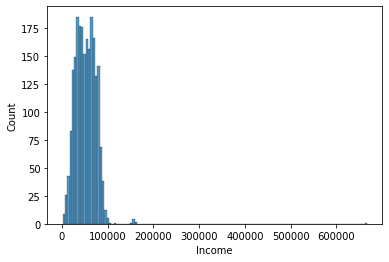

In [247]:
# Plot income distribution with histogram

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(data['Income'])

Income distribution looked symmetric with outliers. Thus, we can replace the missing values with Income median to avoud skewing the distribution because of outliers. 

In [248]:
# Replacing missing values in Income with median 
data['Income'] = data['Income'].fillna(data['Income'].median())

Other than the Income column, we also need to look at the other numerical data columns to find any outliers or anomaly.

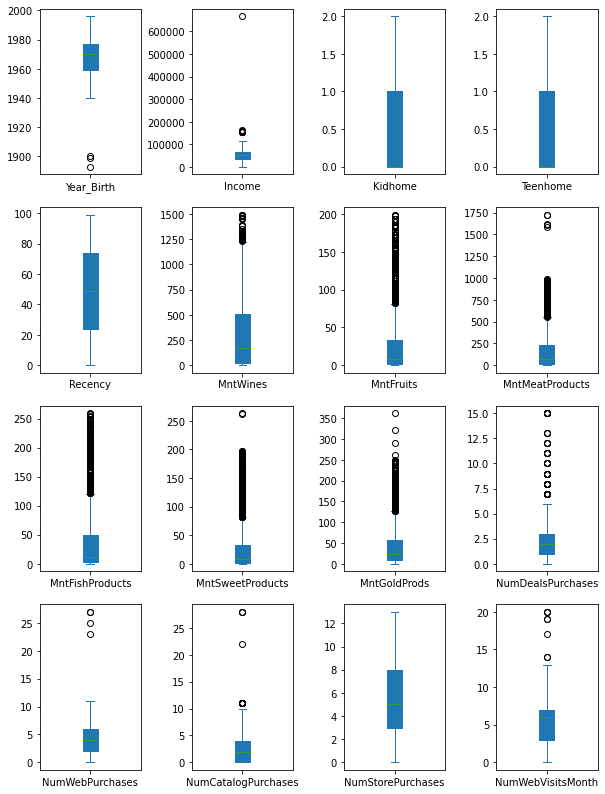

In [249]:
# Looking for outliers in other variables
import numpy as np

# Select numerical variables to check
data_select = data.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                              'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# Plot data_select to check for outliers
data_select.plot(subplots=True, layout=(4,4), kind='box', figsize=(10,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

From the boxplots, we see that many of the values include outliers, but the only ouliers we will be concern at in this project is the Year_Birth column. It make sense that some people have way higher Income, or spend way more money, eat more sweets, or visit a website way more times that other people. But it should concern us that few of our customers are born before the year 1900 since it could be a possible error in the data entry process.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

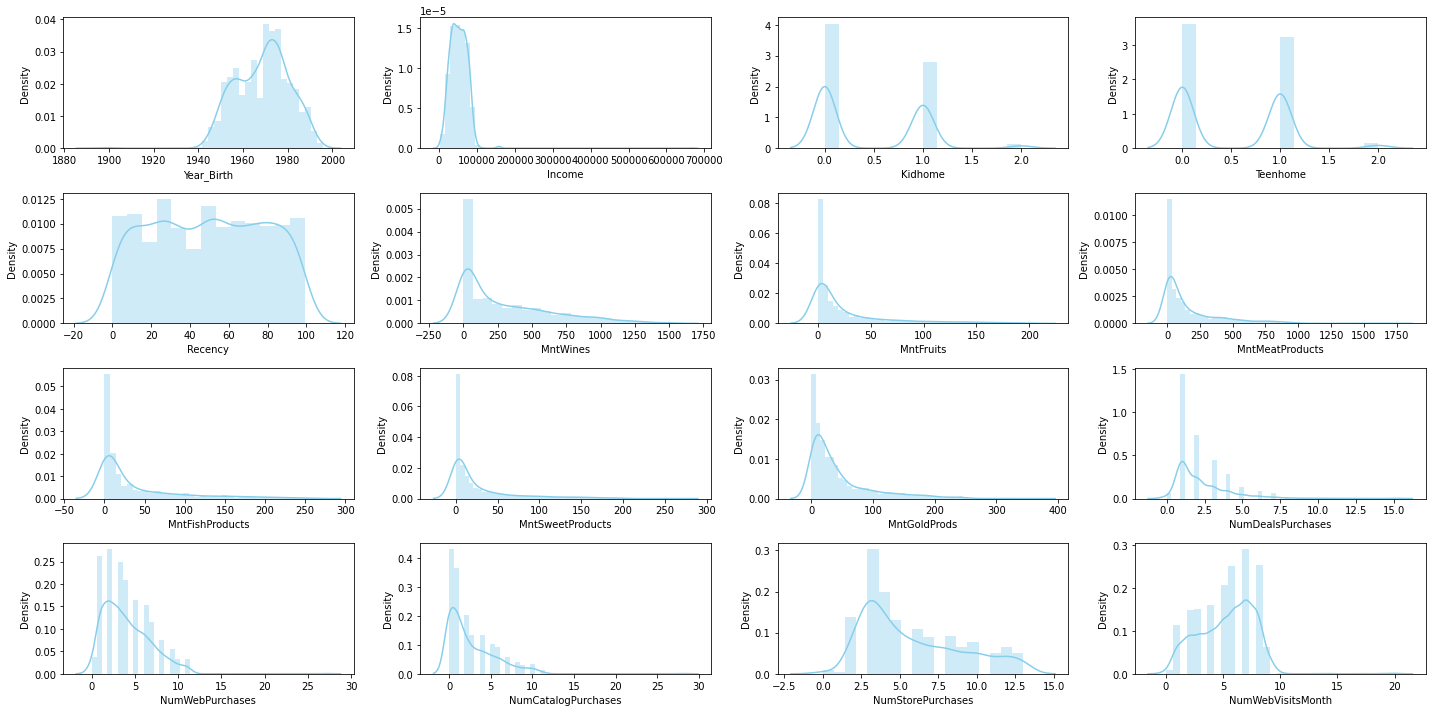

In [250]:
numericals = data_select.columns

plt.figure(figsize=(20,10))
for i in range(0, len(numericals)):
    plt.subplot(4, len(numericals)/4, i+1)
    sns.distplot(x=[data_select[numericals[i]]], color='skyblue')
    plt.xlabel(numericals[i])
    plt.tight_layout()

Looking at the histograms, many ditribution are skewed, this aligned with the boxplot results we saw earlier. However, some are pretty symmetric. There is also a binary data such as Kidhome and Teenhome.

Now let's look at our Year_Birth outliers.

In [251]:
# Looking at oulier values in Year_Birth
np.sort(data['Year_Birth'].unique())

array([1893, 1899, 1900, 1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996])

It appears that we have a data of customers born in the 1893, 1899, and 1900. Lets pull their records

In [252]:
# Looking at the record for oulier years
data[data['Year_Birth']<=1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,SA
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,SP
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,0,1,IND


While it is certainly not impossible that this data is valid and they could have registered as customer at 2013 and 2014, but this is very unlikely. So lets just rule their records out.

array([1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996])

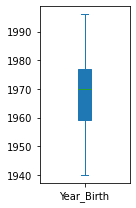

In [253]:
# Excluding records for Year_Birth = [1893, 1899, 1900] (possible data entry error)
data = data[data['Year_Birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(2,3))
data['Year_Birth'].plot(kind='box', patch_artist=True)
plt.tight_layout()

np.sort(data['Year_Birth'].unique())

Now that our data is cleaned and validated, we want to proceed to manipulating our data so that we can extract insights about about customer purchasing behaviour and make suggestion to our next campaign.

First we are going to make a few new columns to ease our analysis such as:
total number of campaign accepted, the year of becoming a customer, number 

*   Total number of campaign accepted (campaign 1-6)
*   the year of becoming a customer (the year from Dt_Customer)
*   number of dependents (kids + teens in home)
*   total amount spent (total from all products), and
*   total number of purchases made (deals, catalog, store, and web purchases) 

In [254]:
# Total Campaigns Accepted
# SUM(AcceptedCmp1-5 + Response)
all_campaign = [col for col in data.columns if 'Cmp' in col] + ['Response'] 
data['TotalAccCmp'] = data[all_campaign].sum(axis=1)

# Year becoming a Customer
data['Year_Customer'] = pd.DatetimeIndex(data['Dt_Customer']).year

# Number of Dependents
data['Dependents'] = data['Kidhome'] + data['Teenhome']

# Total Amount Spent
mnt_cols = [col for col in data.columns if 'Mnt' in col]
data['TotalMnt'] = data[mnt_cols].sum(axis=1)

# Total Number of Purchases Made
purchases_cols = [col for col in data.columns if 'Purchases' in col]
data['TotalPurchases'] = data[purchases_cols].sum(axis=1)

# Check new features by customer ID
data[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalAccCmp']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalAccCmp
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


Let's take a look at out updated data.

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-nul

All new columns are set.

Next we want to subset our data to find a possible correlation that may affect the purchasing behaviour and the result of a campaign. 

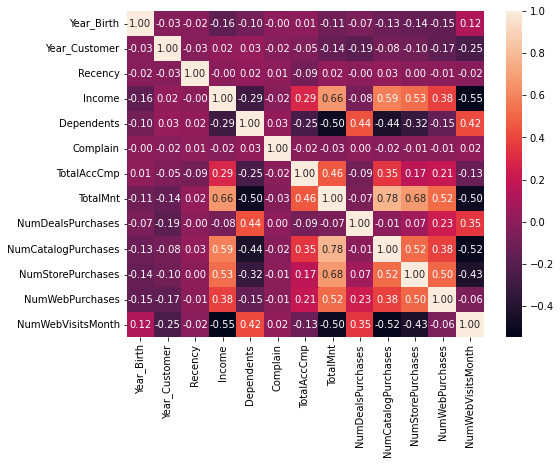

In [256]:
# Correlation using heatmap
subset=['Year_Birth','Year_Customer','Recency','Income','Dependents','Complain',
        'TotalAccCmp','TotalMnt','NumDealsPurchases','NumCatalogPurchases',
        'NumStorePurchases','NumWebPurchases','NumWebVisitsMonth']
subdata=data[subset]

correlation = subdata.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, fmt='.2f')

Findings from our correlation heatmap:

*   People with more catalog purchases tend to accept more campaign
*   People with more catalog purchases tend to spend more
*   People with higher income are associated with more catalog purchases
*   People with high income tend to spend more
*   People who spend more tend to be the ones with more accepted campaign
*   Higher dependents are associated with lower amount spent
*   People with higher dependents tend to have more discounted purchase

Next we will look at the distribution between total campaign accepted and the total amount spent:

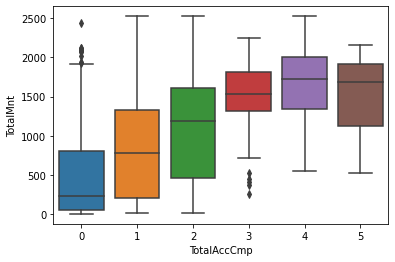

In [257]:
# Relationship and distribution of total amount spent by total campain accepted
sns.boxplot(data=data,x='TotalAccCmp',y='TotalMnt')

The boxplot shows that people who accepted more campaign are associated with spending more amount of money. That is good for business

Now we want to look at how our website is contributing to business. Buying and maintaining website domain comes with a cost, we should make sure this website are providing significant benefits for business. 

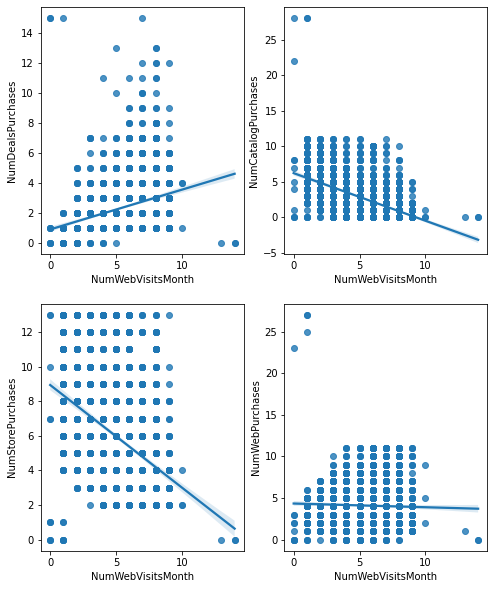

In [258]:
#Creating plot to see performance related to number of web visits

# Relation between number of deals purchases made to number of web visits in the last month
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.regplot(data=data[data['NumWebVisitsMonth']<15],x='NumWebVisitsMonth',y='NumDealsPurchases')#<15 to exclude outliers

# Relation between number of catalog purchases made to number of web visits in the last month
plt.subplot(2,2,2)
sns.regplot(data=data[data['NumWebVisitsMonth']<15],x='NumWebVisitsMonth',y='NumCatalogPurchases')

# Relation between number of in store purchases made to number of web visits in the last month
plt.subplot(2,2,3)
sns.regplot(data=data[data['NumWebVisitsMonth']<15],x='NumWebVisitsMonth',y='NumStorePurchases')

# Relation between number of website purchases made to number of web visits in the last month
plt.subplot(2,2,4)
sns.regplot(data=data[data['NumWebVisitsMonth']<15],x='NumWebVisitsMonth',y='NumWebPurchases')

Number of deals purchases correlates positively with number of web visit in the last past month. This means more web visits are associated with more purchases with discount deals. This could be an excelent opportunity to take campaign seriously in the website.

Number of store and catalog purchases have a negative correlation with web visits. Which, if we think about it, make sense. However, number of purchases in the website also have a negative correlation with number of web visit in the last month, this seems rather strange.

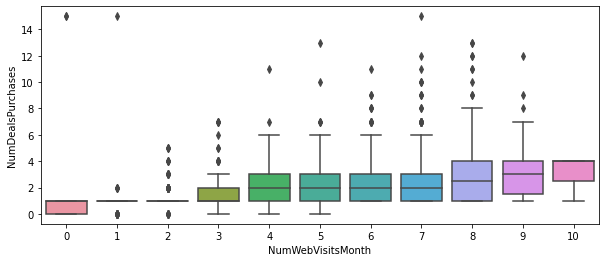

In [259]:
# Distribution of number of deals purchases by web visits
plt.figure(figsize=(10,4))
sns.boxplot(data=data[data['NumWebVisitsMonth']<13],x='NumWebVisitsMonth',y='NumDealsPurchases')

The boxplot below indeed showed an increasing pattern in number of deals purchases made (distrubution and median, even outlier too) with higher website visits.

## Summary


*   Data only have missing values in Income column, handled by replacing with median
*   Many values in the dataset have a skewed distribution and extreme outliers. However, we only remove the records with Year_Birth outliers since it may be an error in the data entry process. Some other outliers are excluded in the making if the plot 
*   The correlation heatmap showed that poeple who made more purchase using catalog tend to spend more amount of money shopping, and people that spend more are associated with more number of campaigns accepted.
*   Higher number of web visits in the last month are associated with more deals purchases made 





